<a href="https://colab.research.google.com/github/mengjie514/Dynamic-Emotional-Messaging/blob/main/Descriptive_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np

# Mount Google Drive and change working directory
from google.colab import drive

def setup_environment(mount_point: str, target_directory: str):
    """
    Mounts Google Drive and changes the working directory.

    Parameters:
        mount_point (str): The mount point for Google Drive.
        target_directory (str): The directory path within Google Drive to navigate to.
    """
    drive.mount(mount_point)
    os.chdir(target_directory)

def load_dataset(file_name: str) -> pd.DataFrame:
    """
    Loads the CSV dataset, removes unnecessary columns, and resets the index.

    Parameters:
        file_name (str): The name of the CSV file to load.

    Returns:
        pd.DataFrame: The cleaned and preprocessed DataFrame.
    """
    try:
        df = pd.read_csv(file_name, encoding='utf-8')
    except FileNotFoundError:
        print(f"File not found: {file_name}")
        return pd.DataFrame()
    except pd.errors.EmptyDataError:
        print(f"No data found in the file: {file_name}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred while reading {file_name}: {e}")
        return pd.DataFrame()

    # Drop unnecessary columns if they exist
    columns_to_drop = ['Unnamed: 0', 'index']
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    if existing_columns:
        df.drop(columns=existing_columns, inplace=True)

    # Reset the index and create a new 'index' column
    df.reset_index(drop=True, inplace=True)
    df.reset_index(inplace=True)  # Creates a new 'index' column

    return df

def configure_pandas_display():
    """
    Configures Pandas display options for better readability.
    """
    pd.set_option('display.max_colwidth', None)  # Unlimited column width

# Main execution block
def main():
    """
    Main function to set up the environment, load the dataset, and configure display settings.
    """
    # Define mount point and target directory
    MOUNT_POINT = '/content/gdrive'
    TARGET_DIRECTORY = '/content/gdrive/My Drive/Colab Notebooks/PSV'

    # Set up the environment
    setup_environment(MOUNT_POINT, TARGET_DIRECTORY)

    # Configure Pandas display options
    configure_pandas_display()

    # Define the CSV file name
    csv_file = ''  # Update file name as needed

    # Load and preprocess the dataset
    df_raw = load_dataset(csv_file)

    if not df_raw.empty:
        # Display the first few rows of the cleaned DataFrame
        print(df_raw.head())
    else:
        print("DataFrame is empty. Please check the CSV file and try again.")

# Execute the main function
if __name__ == "__main__":
    main()

Mounted at /content/gdrive


In [ ]:
# Define the directory containing CSV files
CSV_DIRECTORY = '/path/to/Raw_Data_2018Midterm'

# Change the current working directory to the CSV directory
os.chdir(CSV_DIRECTORY)

# Read the CSV file into a DataFrame
df_raw = pd.read_csv('PSVI_Raw_2018Midterm_Raw.csv', encoding='utf-8', index_col=0)

# Define political party lists
poli_list_D = [
    'SenatorCantwell', 'SenatorCardin', 'SenatorHeitkamp', 'SenatorTester',
    'SenBillNelson', 'SenSherrodBrown', 'SenStabenow', 'timkaine',
    'JennyWilsonUT', 'kyrstensinema', 'TinaSmithMN', 'PhilBredesen',
    'RosenforNevada', 'kdeleon', 'MikeEspyMS', 'JaneRaybould',
    'JoeforIndiana', 'TraunerforWY', 'SenSchumer', 'MartinHeinrich',
    'maziehirono', 'Amy Klobuchar', 'amyklobuchar', 'Chris Murphy',
    'ChrisMurphyCT', 'Claire McCaskill', 'clairecmc', 'Sen. Tammy Baldwin',
    'SenatorBaldwin', 'Senator Tom Carper', 'SenatorCarper',
    'Senator Dianne Feinstein', 'SenFeinstein', 'Kirsten Gillibrand',
    'SenGillibrand', 'Sheldon Whitehouse', 'SenWhitehouse', 'David Baria',
    'dbaria', 'Elizabeth Warren', 'SenWarren', "Beto O'Rourke",
    'BetoORourke', 'Senator Joe Manchin', 'Sen_JoeManchin',
    'Senator Bob Casey', 'SenBobCasey', 'BobMenendezNJ',
    'Senator Bob Menendez', 'SenatorMenendez'
]

poli_list_R = [
    'MittRomney', 'SenatorFischer', 'Rick Scott', 'Campbell4MD',
    'MorriseyWV', 'KarinHousley', 'RobArlett', 'SenJohnBarrasso',
    'Sen. Kevin Cramer', 'JohnJamesMI', 'RepLouBarletta',
    'braun4indiana', 'SenDeanHeller', 'cindyhydesmith', 'JimRenacci',
    'NewbergerJim', 'Susan4Senate', 'BobHugin', 'CheleFarley',
    'flanders4senate', 'MattForMontana', 'MickRich4Senat',
    'DiehlForSenate', 'RepGeoffDiehl', 'MarthaMcSally',
    'SenMcSallyAZ', 'RepMcSally', 'Josh Hawley', 'HawleyMO',
    'Sen. Marsha Blackburn', 'MarshaBlackburn', 'Senator Roger Wicker',
    'SenatorWicker', 'Ted Cruz', 'tedcruz', 'CoreyStewartVA',
    'MattCoreyCT', 'Eric Brakey', 'SenatorBrakey', 'Ron Curtis',
    'rcurtis808'
]

# Remove retweets by excluding rows containing "RT @"
df_raw = df_raw[~df_raw['full_text'].str.contains("RT @", na=False)]

# Define a function to assign political parties
def get_party(screen_name):
    """
    Assigns a political party based on the screen name.

    Parameters:
        screen_name (str): The screen name of the user.

    Returns:
        str or None: 'D' for Democrat, 'R' for Republican, or None if not found.
    """
    if screen_name in poli_list_D:
        return 'D'
    elif screen_name in poli_list_R:
        return 'R'
    else:
        return None

# Assign political parties
df_raw['screen_name_party'] = df_raw['screen_name'].apply(get_party)

# Define columns to keep
columns_to_keep = [
    'created_at', 'full_text', 'retweet_count', 'favorite_count',
    'followers_count', 'friends_count', 'user_id', 'screen_name',
    'screen_name_party'
]

# Select relevant columns
df_senti = df_raw[columns_to_keep]

# Define replacement dictionary
replace_dict = {
    'Amy Klobuchar': 'amyklobuchar',
    'Chris Murphy': 'ChrisMurphyCT',
    'Claire McCaskill': 'clairecmc',
    'Sen. Tammy Baldwin': 'SenatorBaldwin',
    'Senator Tom Carper': 'SenatorCarper',
    'Senator Dianne Feinstein': 'SenFeinstein',
    'Kirsten Gillibrand': 'SenGillibrand',
    'Sheldon Whitehouse': 'SenWhitehouse',
    'David Baria': 'dbaria',
    'Elizabeth Warren': 'SenWarren',
    "Beto O'Rourke": 'BetoORourke',
    'Senator Joe Manchin': 'Sen_JoeManchin',
    'Senator Bob Casey': 'SenBobCasey',
    'Senator Bob Menendez': 'SenatorMenendez',
    'BobMenendezNJ': 'SenatorMenendez',
    'DiehlForSenate': 'RepGeoffDiehl',
    'MarthaMcSally': 'SenMcSallyAZ',
    'RepMcSally': 'SenMcSallyAZ',
    'Josh Hawley': 'HawleyMO',
    'Sen. Marsha Blackburn': 'MarshaBlackburn',
    'Senator Roger Wicker': 'SenatorWicker',
    'Ted Cruz': 'tedcruz',
    'CoreyStewartVA': 'MattCoreyCT',
    'Eric Brakey': 'SenatorBrakey',
    'Ron Curtis': 'rcurtis808'
}

# Apply replacements to 'screen_name'
df_senti['screen_name'] = df_senti['screen_name'].replace(replace_dict)

# Convert 'created_at' to datetime
df_senti['created_at'] = pd.to_datetime(df_senti['created_at'])

# Define the date range for filtering
start_date = '2018-10-09'
end_date = '2018-12-04'

# Filter the DataFrame based on the date range
df_senti_filtered = df_senti[
    (df_senti['created_at'] >= start_date) &
    (df_senti['created_at'] <= end_date)
]

# Save the filtered DataFrame to a new CSV file
df_senti_filtered.to_csv('filtered_sentiment_data.csv', index=False)

In [ ]:
# Read the CSV file into a DataFrame
df_raw_2 = pd.read_csv('PSVI_Raw_2022Midterm_Raw.csv', encoding='utf-8', index_col=0)

# Define political party lists
poli_list_D = [
    'CheriBeasleyNC', 'SenBlumenthal', 'Booker4KY', 'willboydforAL',
    'buschvalentine', 'ChrisVanHollen', 'GaryChambersJr', 'JamesForAR',
    'FrankenforIowa', 'BrianBengs', 'rothforIdaho', 'madisonhornok',
    'katrina_senate', 'SenAlexPadilla', 'AlexPadilla4CA', 'SenatorWarnock',
    'ReverendWarnock', 'brianschatz', 'SenBrianSchatz', 'JohnFetterman',
    'FettermanLt', 'SenDuckworth', 'TammyDuckworth', 'TheOtherMandela',
    'LGMandelaBarnes', 'chuckschumer', 'SenSchumer', 'RonWyden',
    'WydenPress', 'WydenForOregon', 'SenCortezMasto', 'CortezMasto',
    'PattyMurray', 'MurrayCampaign', 'RepTimRyan', 'Timothy_F_Ryan',
    'TimRyan', 'PeterWelch', 'WelchForVT', 'RepValDemings', 'valdemings',
    'SenatorBennet', 'MichaelBennet', 'SenatorHassan', 'Maggie_Hassan',
    'gomcdermott', 'tommcdermottjr', 'CaptMarkKelly', 'SenMarkKelly',
    'HornForCongress', 'VoteKendraOK'
]

poli_list_R = [
    'KatieBrittforAL', 'DrOz', 'HerschelWalker', 'ODeaForColorado',
    'JerryMoran', 'geraldmalloySC', 'GenDonBolduc', 'SmileyForWA',
    'JosephPinion', 'salviforsenate', 'MarkMeuser', 'AdamLaxalt',
    'SenRonJohnson', 'KellyForAlaska', 'SenJohnHoeven', 'LeoraLevyCT',
    'bgmasters', 'JDVance1', 'SenTedBuddNC', 'ChaffeeUSSenate',
    'ChuckGrassley', 'GrassleyWorks', 'SenMikeLee', 'MikeLeeforUtah',
    'BasedMikeLee', 'SenMarcoRubio', 'marcorubio', 'SenRubioPress',
    'Eric_Schmitt', 'EricSchmittNYT', 'SenatorTimScott', 'votetimscott',
    'JohnKennedyLA', 'SenJohnKennedy', 'JohnBoozman', 'Boozman4AR',
    'lisamurkowski', 'LisaForSenate', 'SenRandPaul', 'RandPaul',
    'SenMullin', 'MarkwayneMullin', 'SenatorLankford', 'jameslankford',
    'MikeCrapo', 'crapoforsenate', 'SenToddYoung', 'ToddYoungIN',
    'SenJohnThune', 'johnthune', 'EvanMcMullin'
]

# Remove retweets by excluding rows containing "RT @"
df_raw_2 = df_raw_2[~df_raw_2['full_text'].str.contains("RT @", na=False)]

# Define a function to assign political parties
def assign_party(screen_name):
    """
    Assigns a political party based on the screen name.

    Parameters:
        screen_name (str): The screen name of the user.

    Returns:
        str or None: 'D' for Democrat, 'R' for Republican, or None if not found.
    """
    if screen_name in poli_list_D:
        return 'D'
    elif screen_name in poli_list_R:
        return 'R'
    else:
        return None

# Assign political parties
df_raw_2['screen_name_party'] = df_raw_2['screen_name'].apply(assign_party)

# Specify the columns to keep
columns_to_keep = [
    'created_at', 'full_text', 'retweet_count', 'favorite_count',
    'followers_count', 'friends_count', 'user_id', 'screen_name',
    'screen_name_party'
]

# Select relevant columns
df_senti_2 = df_raw_2[columns_to_keep].copy()

# Define replacement dictionary
replace_dict = {
    'CaptMarkKelly': 'SenMarkKelly',
    'AlexPadilla4CA': 'SenAlexPadilla',
    'MichaelBennet': 'SenatorBennet',
    'marcorubio': 'SenMarcoRubio',
    'brianschatz': 'SenBrianSchatz',
    'RandPaul': 'SenRandPaul',
    'JohnKennedyLA': 'SenJohnKennedy',
    'CortezMasto': 'SenCortezMasto',
    'votetimscott': 'SenatorTimScott',
    'BasedMikeLee': 'SenMikeLee',
    'MikeLeeforUtah': 'SenMikeLee',
    'VoteKendraOK': 'HornForCongress',
    'WelchForVT': 'PeterWelch',
    'WydenPress': 'RonWyden',
    'WydenForOregon': 'RonWyden',
    'EricSchmittNYT': 'Eric_Schmitt',
    'Timothy_F_Ryan': 'RepTimRyan',
    'TimRyan': 'RepTimRyan',
    'TammyDuckworth': 'SenDuckworth',
    'LisaForSenate': 'lisamurkowski',
    'GrassleyWorks': 'ChuckGrassley',
    'johnthune': 'SenJohnThune',
    'Boozman4AR': 'JohnBoozman',
    'crapoforsenate': 'MikeCrapo',
    'ToddYoungIN': 'SenToddYoung',
    'jameslankford': 'SenatorLankford',
    'MarkwayneMullin': 'SenMullin',
    'tommcdermottjr': 'gomcdermott',
    'MurrayCampaign': 'PattyMurray',
    'LGMandelaBarnes': 'TheOtherMandela',
    'Maggie_Hassan': 'SenatorHassan',
    'valdemings': 'RepValDemings',
    'FettermanLt': 'JohnFetterman',
    'ReverendWarnock': 'SenatorWarnock',
    'SenSchumer': 'chuckschumer'
}

# Apply replacements to 'screen_name'
df_senti_2['screen_name'] = df_senti_2['screen_name'].replace(replace_dict)

# Convert 'created_at' to datetime
df_senti_2['created_at'] = pd.to_datetime(df_senti_2['created_at'])

# Define the date range for filtering
start_date = '2022-10-11'
end_date = '2022-12-06'

# Filter the DataFrame based on the date range
df_senti_filtered_2 = df_senti_2[
    (df_senti_2['created_at'] >= start_date) &
    (df_senti_2['created_at'] <= end_date)
]

# Save the filtered DataFrame to a new CSV file
df_senti_filtered_2.to_csv('filtered_sentiment_data_2022.csv', index=False)

<ipython-input-4-091b402e29be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senti_filtered['date'] = df_senti_filtered['created_at'].dt.date
<ipython-input-4-091b402e29be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senti_filtered_2['date'] = df_senti_filtered_2['created_at'].dt.date


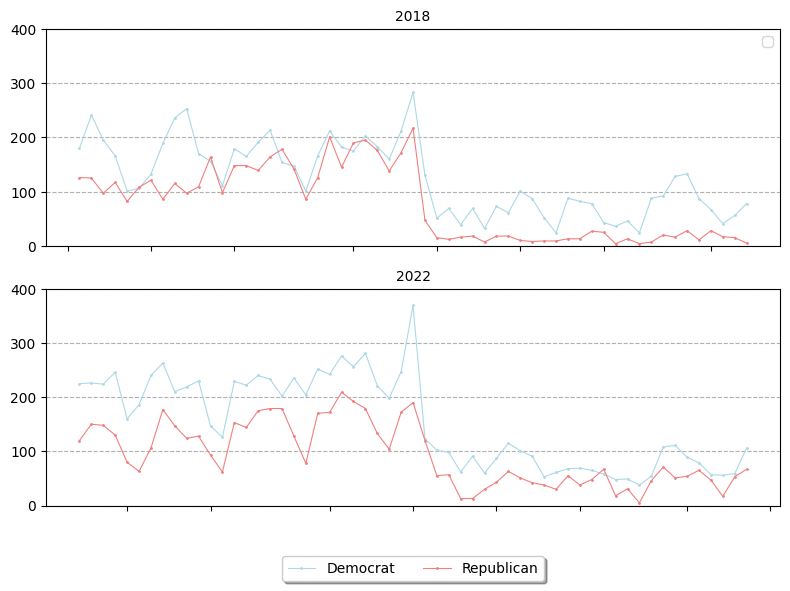

In [ ]:
# Convert 'created_at' to date only
df_senti_filtered['date'] = df_senti_filtered['created_at'].dt.date
df_senti_filtered_2['date'] = df_senti_filtered_2['created_at'].dt.date

# Count the number of tweets per day for 2018 by political group
tweets_per_day_2018 = df_senti_filtered.groupby(['date', 'screen_name_party']).size().unstack().fillna(0)

# Count the number of tweets per day for 2022 by political group
tweets_per_day_2022 = df_senti_filtered_2.groupby(['date', 'screen_name_party']).size().unstack().fillna(0)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Define plotting parameters
plot_params = {
    'D': {'color': 'lightblue', 'label': 'Democrat'},
    'R': {'color': 'lightcoral', 'label': 'Republican'}
}

# Plot the number of daily tweets for 2018 by political group
for party, params in plot_params.items():
    if party in tweets_per_day_2018.columns:
        axes[0].plot(
            tweets_per_day_2018.index,
            tweets_per_day_2018[party],
            marker='o',
            linestyle='-',
            markersize=2,
            linewidth=1,
            color=params['color'],
            label=params['label']
        )

axes[0].set_title('2018', fontsize=12)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0].set_ylim(0, 400)
axes[0].grid(axis='y', linestyle='--')

# Plot the number of daily tweets for 2022 by political group
for party, params in plot_params.items():
    if party in tweets_per_day_2022.columns:
        axes[1].plot(
            tweets_per_day_2022.index,
            tweets_per_day_2022[party],
            marker='o',
            linestyle='-',
            markersize=2,
            linewidth=1,
            color=params['color'],
            label=params['label']
        )

axes[1].set_title('2022', fontsize=12)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1].set_ylim(0, 400)
axes[1].grid(axis='y', linestyle='--')

# Remove y-labels
for ax in axes:
    ax.set_ylabel('')

# Remove x-axis labels and tick labels for the first subplot
axes[0].set_xlabel('')
axes[0].set_xticklabels([])

# Add a common legend to the second subplot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()